python3 version: 3.7.0

print( numpy.version.version ): 1.15.1

print( matplotlib.__version__ ): 2.2.3

In [89]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
def load_data(filename):
    datas = []
    with open(filename, "r") as ins:
        for line in ins:
            [ x, y ] = line.rstrip().split('\t')
            datas.append( [ np.array( [1] + x.split(" "), dtype="float" ), float(y) ] )

    X, Y  = np.zeros((len(datas), 5)), np.zeros((len(datas), 1))
    for idx, data in enumerate(datas):
        X[idx], Y[idx] = data[0], data[1]
    return [X, Y]

p15_17_datas = load_data("hw1_15_train.dat")
p18_20_datas = load_data("hw1_18_train.dat")
p18_20_tests = load_data("hw1_18_test.dat" )

w_0 = np.zeros((5, 1))

In [91]:
def shuffle_datas(datas):
    indices = np.random.permutation(datas[0].shape[0])
    return [ data[indices] for data in datas ]

def calc_error_num(output, Y):
    return np.sum(output != Y)

def calc_error_rate(w, datas):
    output = np.sign( datas[0].dot(w) )
    output[ np.where( output == 0 ) ] = -1

    return calc_error_num(output, datas[1])/(datas[0].shape[0])

def pocket_pla(w, datas, eta = 1, update_limit = 0, last=False):
    pocket, update_count, least_error_count = w.copy(), 0, datas[0].shape[0]
    X, Y = datas

    position = 0
    while(True):
        output = np.sign( X.dot(w) )
        output[ np.where( output == 0 ) ] = -1
        
        current_error_count = calc_error_num(output, Y)
        if least_error_count > current_error_count:
            least_error_count = current_error_count
            pocket = w.copy()

        if (least_error_count == 0) or \
           (update_limit != 0 and update_count >= update_limit):
            result = pocket if not last else w
            return { "w": result, "update count": update_count }

        error_index = np.where( output != Y )[0]
        if not error_index[ error_index >= position ].any():
            position = 0
        position = error_index[ error_index >= position ][0]
        w += eta * Y[position, 0] * X[position:position+1, :].T

        update_count += 1

p15    update count:  39.000
p16    update count:  40.334
p17    update count:  40.302
p18      error rate:   0.137
p19      error rate:   0.369
p20      error rate:   0.118
p07    update count:  40.476


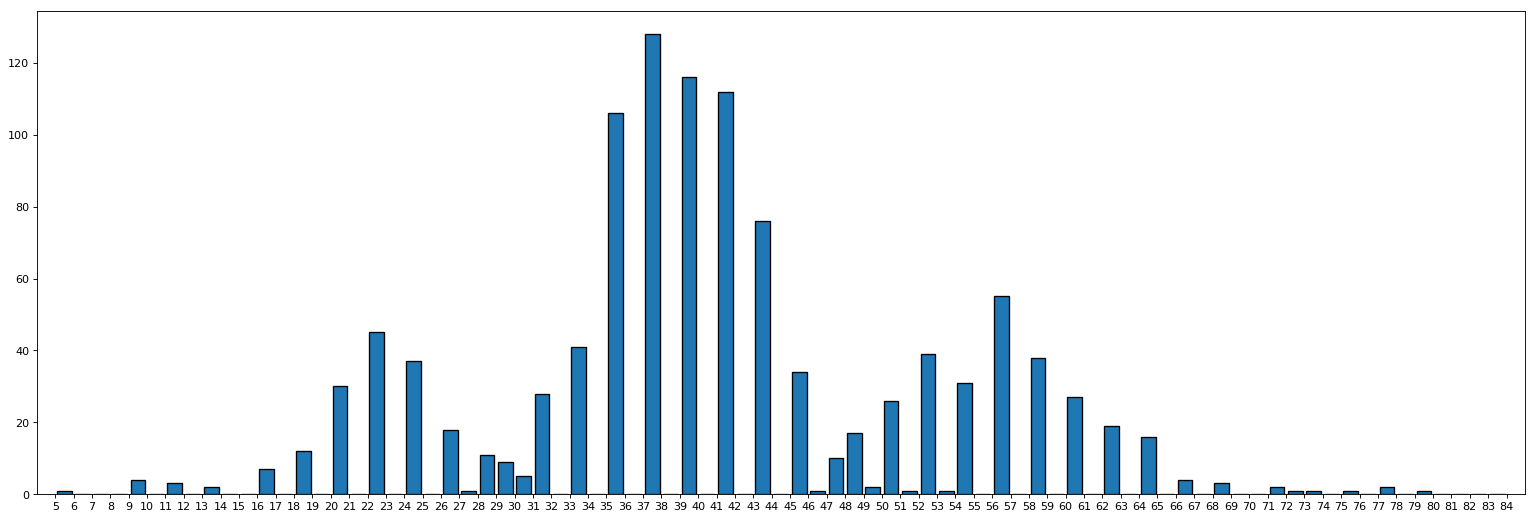

In [93]:
def draw_histogram(total):
    datas_range = range( min(total), max(total), 1 )
    plt.figure(num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.xticks(datas_range)
    plt.xlim([datas_range[0]-1, datas_range[-1]+1])
    plt.hist( total, edgecolor='black', linewidth=1.2, bins=datas_range, rwidth=0.8 )
    plt.show()

def experiment(
    problem, experiment_num, calc_prop, datas, tests=None,
    random_datas=True, eta=1, update_limit=0, last=False, histogram=False
):
    datas, total = datas.copy(), []
    for _ in range(experiment_num):
        datas = shuffle_datas(datas) if random_datas else datas
        if   ( calc_prop == "update count" ):
            total.append( pocket_pla(w_0.copy(), datas, eta=eta )[calc_prop] )
        elif ( calc_prop == "error rate"   ):
            w = pocket_pla(w_0.copy(), datas, update_limit=update_limit, last=last)["w"]
            total.append( calc_error_rate( w, tests ) )
    print ('%3s %15s: %7.3f' % (problem, calc_prop, sum(total)/experiment_num))
    
    if histogram:
        draw_histogram(total)

experiment( "p15", 1   , "update count", p15_17_datas, random_datas=False                                )
experiment( "p16", 2000, "update count", p15_17_datas                                                    )
experiment( "p17", 2000, "update count", p15_17_datas, eta=0.5                                           )
experiment( "p18", 2000, "error rate"  , p18_20_datas, update_limit=50 , tests=p18_20_tests              )
experiment( "p19", 2000, "error rate"  , p18_20_datas, update_limit=50 , tests=p18_20_tests, last = True )
experiment( "p20", 2000, "error rate"  , p18_20_datas, update_limit=100, tests=p18_20_tests              )
experiment( "p07", 1126, "update count", p15_17_datas, histogram=True                                    )